In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import pandas as pd
import statistics
import datetime

In [2]:
df = pd.read_csv('Percolation Results - Randomness 2024-02-11.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,Parameter Value (Randomness of SW diagram),Average Path Length,Propagation Time,Average Degree of a Node,Number of Subgraphs,Maximum Clique Size,Percentage of Population Infected
0,0.00,500.250125,999.0,2.0,1.0,2.0,0.8025
1,0.05,60.977071,435.0,2.0,3.0,2.0,0.8945
2,0.10,42.716301,320.0,2.0,3.0,2.0,0.9730
3,0.15,48.261277,160.0,2.0,2.0,2.0,0.9305
4,0.20,88.895712,279.0,2.0,1.0,2.0,1.0000
5,0.25,24.164616,252.0,2.0,5.0,2.0,0.8810
6,0.30,39.684552,116.0,2.0,3.0,2.0,0.2525
7,0.35,25.646638,123.0,2.0,4.0,2.0,0.6665
8,0.40,22.796178,153.0,2.0,3.0,3.0,0.9805
9,0.45,30.544836,133.0,2.0,3.0,2.0,0.7260


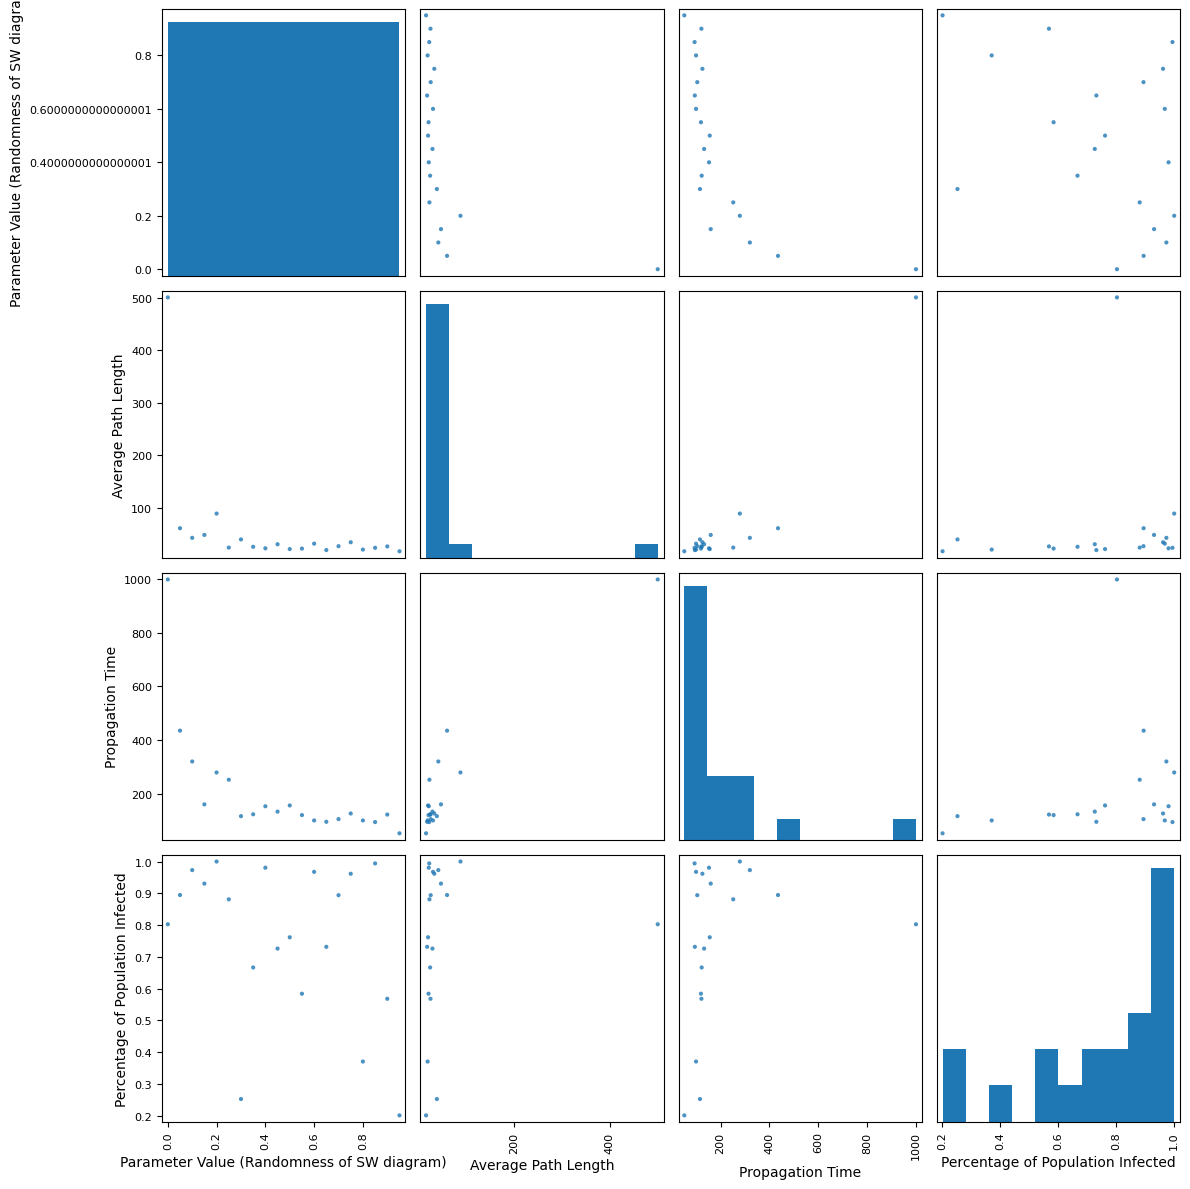

In [5]:
pd.plotting.scatter_matrix(df[['Parameter Value (Randomness of SW diagram)', 'Average Path Length', 'Propagation Time', 'Percentage of Population Infected']], alpha = 0.8, figsize = (12,12), diagonal = 'hist')
plt.tight_layout()
plt.show()

## Investigation: effect of varying probability of infection

The following features will be considered:
- Height and time of plateau in cumulative cases
- Number of new cases at every time step: what does the shape of this look like? If there is a peak, when does the peak happen?
- Does there exist a critical phase transition limit?
- Phenomenon of critical slowing down just beofre the critical transition limit? 

Parameters of the simulation: `G = Pandemic_Network(nodes = 100000, network_type='Small World', pandemicprob = i, sicknode = 1, SW_connections = 3, edge_randomness = 0.2, reduced_prob = 0.1, mitigation_proportion = 0, plots = False).propagate(1000)`

In [12]:
bond_df = pd.read_csv('Bond Percolation Data, varying probability of infection - 2024-02-21.csv')
bond_df = bond_df.drop('Unnamed: 0', axis = 1)

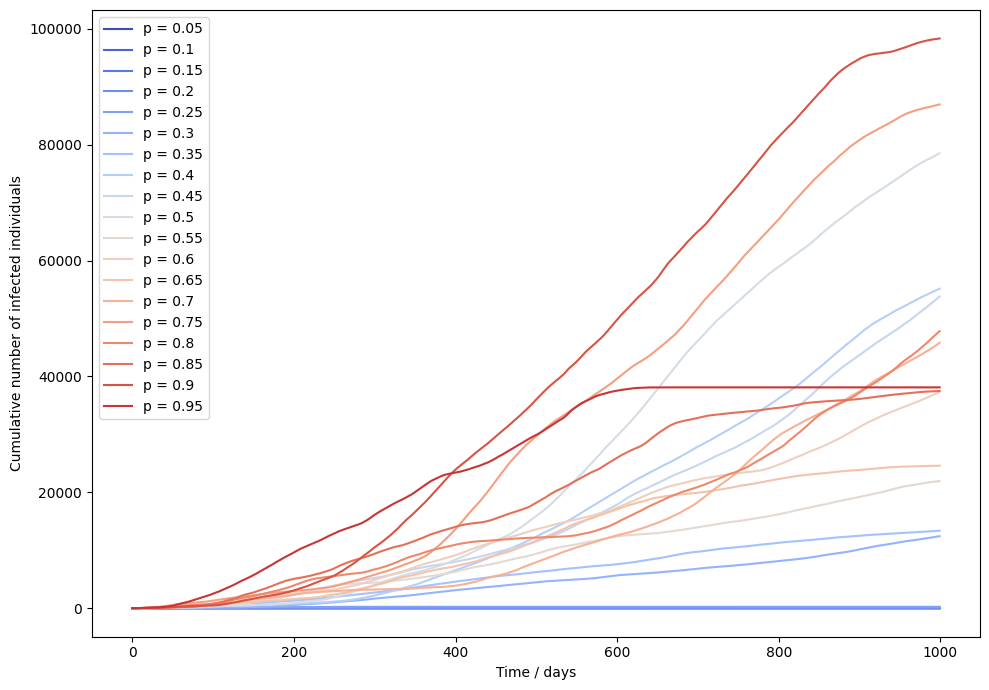

In [21]:
timestamp = [i for i in range(len(bond_df['0.05']))]
param_vals = [str(i/20)for i in range(1,20)]

plt.figure(figsize = (10,7))
for i in range(len((param_vals))):
    plt.plot(timestamp, bond_df[param_vals[i]], color = cm.coolwarm(i/len(param_vals)), label = 'p = {}'.format(param_vals[i]))
plt.xlabel('Time / days')
plt.ylabel('Cumulative number of infected individuals')
plt.legend()
plt.tight_layout()
plt.show()

Consider number of new infections at each timestamp

In [22]:
new_collected = []
for i in param_vals:
    new = []
    new = [bond_df[i][ind] - bond_df[i][ind-1] for ind in range(1,len(bond_df[i]))]
    new_collected.append(new)

In [25]:
new_df = pd.DataFrame(data = [i for i in new_collected]).transpose()
new_df.columns = [str(i) for i in param_vals]

date = datetime.date.today()
new_df.to_csv('Bond Percolation Data, newly infected, varying probability of infection - {}.csv'. format(date))

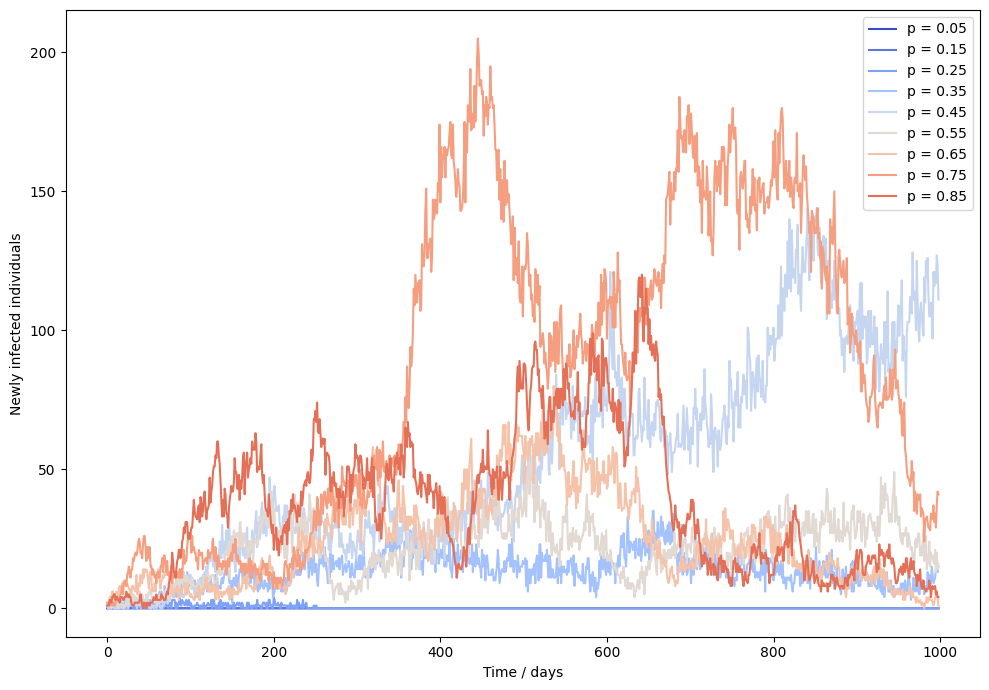

In [31]:
plt.figure(figsize = (10,7))
for i in range(int(len((param_vals))/2)):
    plt.plot(timestamp[:-1], new_df[param_vals[2*i]], color = cm.coolwarm((2*i)/len(param_vals)), label = 'p = {}'.format(param_vals[2*i]))
plt.xlabel('Time / days')
plt.ylabel('Newly infected individuals')
plt.legend()
plt.tight_layout()
plt.show()

The data that will be analysed was simulated with the following command:

`G = Pandemic_Network(nodes = 10000, network_type='Small World', pandemicprob = i, sicknode = 1, SW_connections = 3, edge_randomness = 0.2, reduced_prob = 0.1, mitigation_proportion = 0, plots = False).propagate(1000)`

In [71]:
mul_df = pd.read_csv('Bond Percolation Data, multiple runs, varying probability of infection - 2024-02-21.csv')
mul_df = mul_df.drop('Unnamed: 0', axis = 1)
param_vals = [str(i/20)for i in range(1,20)]

for p in param_vals:
    for r in range(len(mul_df[p])):
        mul_df[p][r] = [int(i) for i in list(mul_df[p][r][1:-1].split(", "))] # for some reason data imported as string

In [81]:
# find mean and standard deviation
total_mean = []
total_stddev = []
for p in param_vals:
    means = []
    stddev = []
    for c in range(1, len(mul_df[p][0])): # each column
        means.append(statistics.mean([int(mul_df[p][r][c]) for r in range(len(mul_df[p]))]))
        stddev.append(statistics.stdev([int(mul_df[p][r][c]) for r in range(len(mul_df[p]))]))
    total_mean.append(means)
    total_stddev.append(stddev)


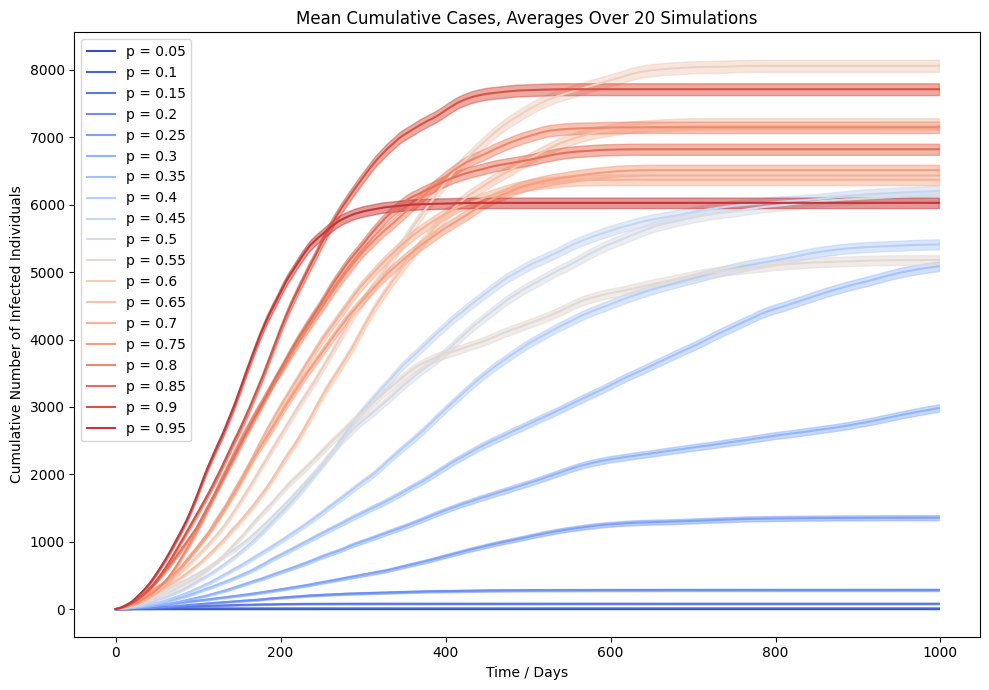

In [90]:
timestamps = [i for i in range(len(total_mean[0]))]
plt.figure(figsize = (10,7))
for i in range(len(total_mean)):
    plt.plot(timestamps, total_mean[i], color = cm.coolwarm(i/19), label = 'p = {}'.format(param_vals[i]))
    plt.fill_between(timestamps, y1 = np.array(total_mean[i]) + np.sqrt(total_mean[i]), y2 = np.array(total_mean[i]) - np.sqrt(total_mean[i]), color = cm.coolwarm(i/19), alpha = 0.5)
plt.xlabel('Time / Days')
plt.ylabel('Cumulative Number of Infected Individuals')
plt.legend()
plt.title('Mean Cumulative Cases, Averages Over 20 Simulations')
plt.tight_layout()
plt.show()

In [97]:
new_collected = []
for i in range(len(total_mean)):
    new_collected.append([total_mean[i][ind] - total_mean[i][ind-1] for ind in range(1,len(total_mean[i]))])

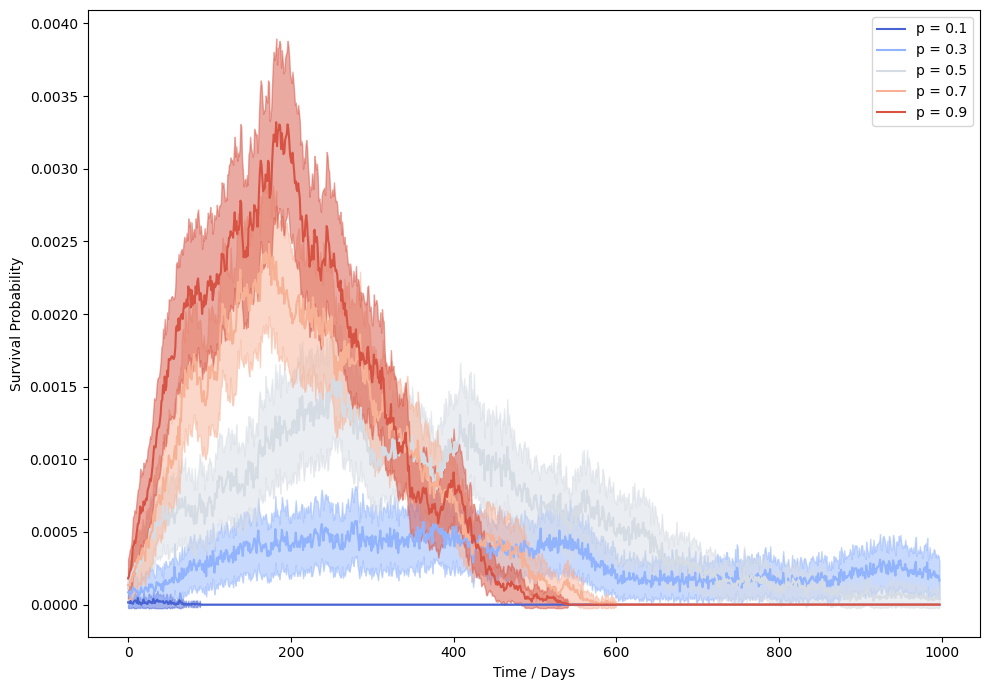

In [108]:
plt.figure(figsize = (10,7))
for i in range(1, len(new_collected), 4):
    plt.plot(timestamps[:-1], np.array(new_collected[i])/10000, color = cm.coolwarm(i/19), label = 'p = {}'.format(param_vals[i]))
    plt.fill_between(timestamps[:-1], y1 = np.array(new_collected[i])/10000 + np.sqrt(new_collected[i])/10000, y2 = np.array(new_collected[i])/10000 - np.sqrt(new_collected[i])/10000, color = cm.coolwarm(i/19), alpha = 0.5)
plt.xlabel('Time / Days')
plt.ylabel('Survival Probability')
plt.legend()
plt.tight_layout()
plt.show()

In [125]:
cumulative_df = pd.read_csv('Cumulative Data, multiple runs, varying probability of infection - 2024-02-22.csv')
infectious_df = pd.read_csv('Infectious Data, multiple runs, varying probability of infection - 2024-02-22.csv')

cumulative_df = cumulative_df.drop('Unnamed: 0', axis = 1)
infectious_df = infectious_df.drop('Unnamed: 0', axis = 1)

param_vals = [str(i/20)for i in range(1,20)]

for p in param_vals:
    for r in range(len(cumulative_df[p])):
        cumulative_df[p][r] = [int(i) for i in list(cumulative_df[p][r][1:-1].split(", "))] # for some reason data imported as string
        infectious_df[p][r] = [int(i) for i in list(infectious_df[p][r][1:-1].split(", "))] # for some reason data imported as string

In [131]:
# find mean and standard deviation
total_mean = []
total_stddev = []
for p in param_vals:
    means = []
    stddev = []
    for c in range(1, len(infectious_df[p][0])): # each column
        means.append(statistics.mean([int(infectious_df[p][r][c])/10000 for r in range(len(infectious_df[p]))]))
        stddev.append(statistics.stdev([int(infectious_df[p][r][c])/10000 for r in range(len(infectious_df[p]))]))
    total_mean.append(means)
    total_stddev.append(stddev)


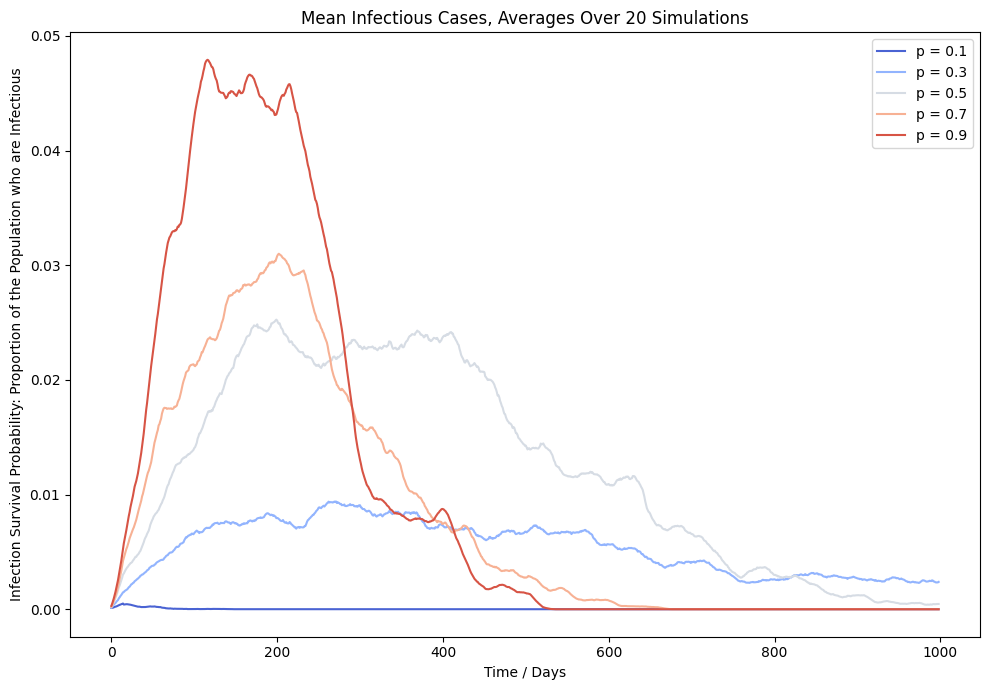

In [144]:
timestamps = [i for i in range(len(total_mean[0]))]
plt.figure(figsize = (10,7))
for i in range(1, len(total_mean), 4):
    plt.plot(timestamps, total_mean[i], color = cm.coolwarm(i/19), label = 'p = {}'.format(param_vals[i]))
    # plt.fill_between(timestamps, y1 = np.array(total_mean[i]) + np.sqrt(total_stddev[i]), y2 = np.array(total_mean[i]) - np.sqrt(total_stddev[i]), color = cm.coolwarm(i/19), alpha = 0.5)
plt.xlabel('Time / Days')
plt.ylabel('Infection Survival Probability: Proportion of the Population who are Infectious')
plt.legend()
plt.title('Mean Infectious Cases, Averages Over 20 Simulations')
plt.tight_layout()
plt.show()

# Average Path Length Analysis

In [62]:
apl_df = pd.read_csv('Average Path Length Data for varying probabilities and average number of connections, effective mitigation - 2024-02-23.csv')
apl_df = apl_df.drop('Unnamed: 0', axis = 1)
# apl_df = apl_df.drop('Proportion of Population Adopting Mitigation', axis = 1)

apl_df_2 = pd.read_csv('Average Path Length Data for varying probabilities and average number of connections, effective mitigation (updates) - 2024-02-23.csv')
apl_df_2 = apl_df_2.drop('Unnamed: 0', axis = 1)


In [63]:
con_6 = apl_df_2['6']
con_7 = apl_df_2['7']
apl_df['6'] = con_6
apl_df['7'] = con_7
apl_df

,2,3,4,5,6,7
0,"[0.1, 42.57297278922878, 497.792981563025]","[0.1018, 42.57297278922878, 468.89067038421103]","[0.1021, 6.9984375275055015, 8.005214962992598]","[0.0973, 6.9984375275055015, 7.755232646529306]","[0.1024, 5.283807081416283, 5.609565913182636]","[0.0966, 5.283807081416283, 5.587832686537308]"
1,"[0.2024, 42.57297278922878, 839.8452250694148]","[0.1984, 42.57297278922878, 784.8725460410559]","[0.2, 6.9984375275055015, 10.126725585117024]","[0.1967, 6.9984375275055015, 10.117808681736348]","[0.19606666666666667, 5.283807081416283, 6.079...","[0.20733333333333334, 5.283807081416283, 6.174..."
2,"[0.2894, 42.57297278922878, 1241.9443187917275]","[0.2978, 42.57297278922878, 1230.6583593408504]","[0.2883, 6.9984375275055015, 13.729151590318063]","[0.2973, 6.9984375275055015, 14.180789117823565]","[0.298, 5.283807081416283, 7.1920875375075015]","[0.2992, 5.283807081416283, 7.115824764952991]"
3,"[0.4074, 42.57297278922878, 1798.5587136276804]","[0.4036, 42.57297278922878, 1742.0406093664192]","[0.3908, 6.9984375275055015, 23.829645209041807]","[0.4033, 6.9984375275055015, 25.058758071614324]","[0.4020666666666667, 5.283807081416283, 9.2757...","[0.3998, 5.283807081416283, 9.543535667133426]"
4,"[0.5042, 42.57297278922878, 2108.9923436501062]","[0.5082, 42.57297278922878, 2330.5592320279525]","[0.5048, 6.9984375275055015, 51.31074870974195]","[0.5006, 6.9984375275055015, 51.08698267653531]","[0.49846666666666667, 5.283807081416283, 14.08...","[0.507, 5.283807081416283, 15.424815523104622]"
5,"[0.5936, 42.57297278922878, 2566.5004769753473]","[0.6022, 42.57297278922878, 2536.783455998903]","[0.5969, 6.9984375275055015, 103.89388085617124]","[0.5951, 6.9984375275055015, 107.27420340068014]","[0.5976666666666667, 5.283807081416283, 29.223...","[0.6039333333333333, 5.283807081416283, 30.905..."
6,"[0.7076, 42.57297278922878, 2997.015287691212]","[0.7092, 42.57297278922878, 3065.380857802551]","[0.6959, 6.9984375275055015, 252.57208865773154]","[0.7068, 6.9984375275055015, 287.40221092218445]","[0.6970666666666666, 5.283807081416283, 65.772...","[0.6938, 5.283807081416283, 62.04264428885777]"
7,"[0.8096, 42.57297278922878, 3507.0537477817948]","[0.8, 42.57297278922878, 3368.190045747998]","[0.7988, 6.9984375275055015, 441.04379147829565]","[0.7983, 6.9984375275055015, 429.4246144428886]","[0.8032, 5.283807081416283, 238.8223696739348]","[0.7977333333333333, 5.283807081416283, 216.48..."
8,"[0.8992, 42.57297278922878, 3829.588293338886]","[0.8984, 42.57297278922878, 3789.102178961693]","[0.8958, 6.9984375275055015, 568.4657668333667]","[0.9005, 6.9984375275055015, 575.5311967993599]","[0.8993333333333333, 5.283807081416283, 385.29...","[0.8999333333333334, 5.283807081416283, 395.58..."


In [64]:
cons = ['2','3','4','5', '6', '7']

for p in cons:
    for r in range(len(apl_df[p])):
        apl_df[p][r] = [float(i) for i in list(apl_df[p][r][1:-1].split(", "))] # for some reason data imported as string


Investigate effect of 99% efficient mitigation measures

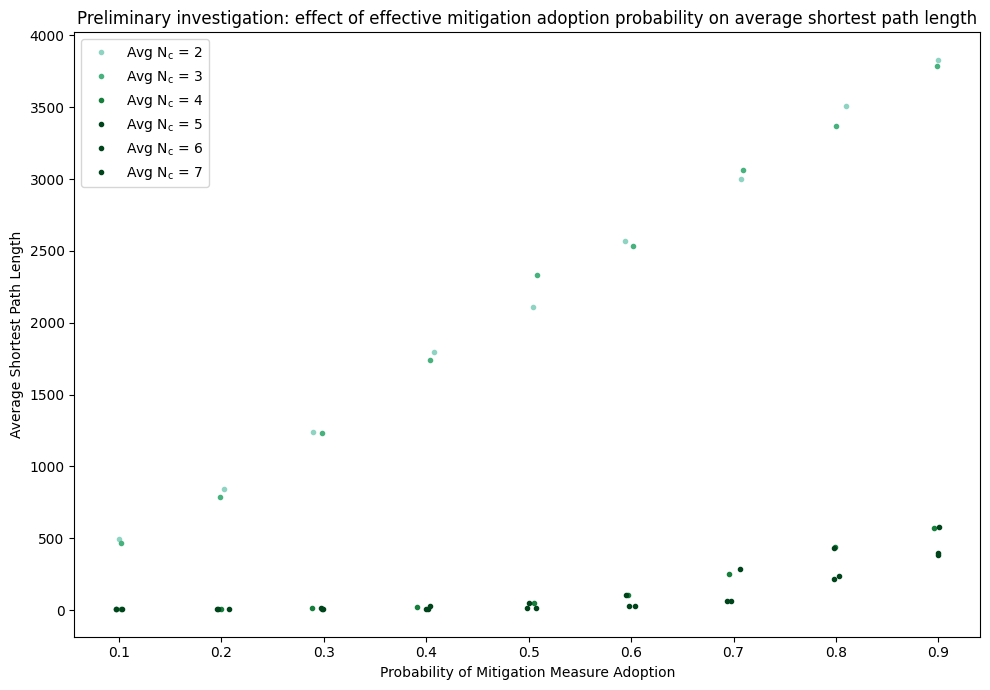

In [65]:
plt.figure(figsize = (10,7))
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

for c in cons:
        plt.plot([apl_df[c][i][0] for i in range(len(apl_df[c]))], [apl_df[c][i][2] for i in range(len(apl_df[c]))], '.', color = cm.BuGn(int(c)/5), label = 'Avg N$_c$ = {}'.format(c))

plt.xlabel('Probability of Mitigation Measure Adoption')
plt.ylabel('Average Shortest Path Length')
plt.legend()
plt.title('Preliminary investigation: effect of effective mitigation adoption probability on average shortest path length')
# plt.yscale('log')
plt.tight_layout()
plt.show()


## Calculate relative change in path length

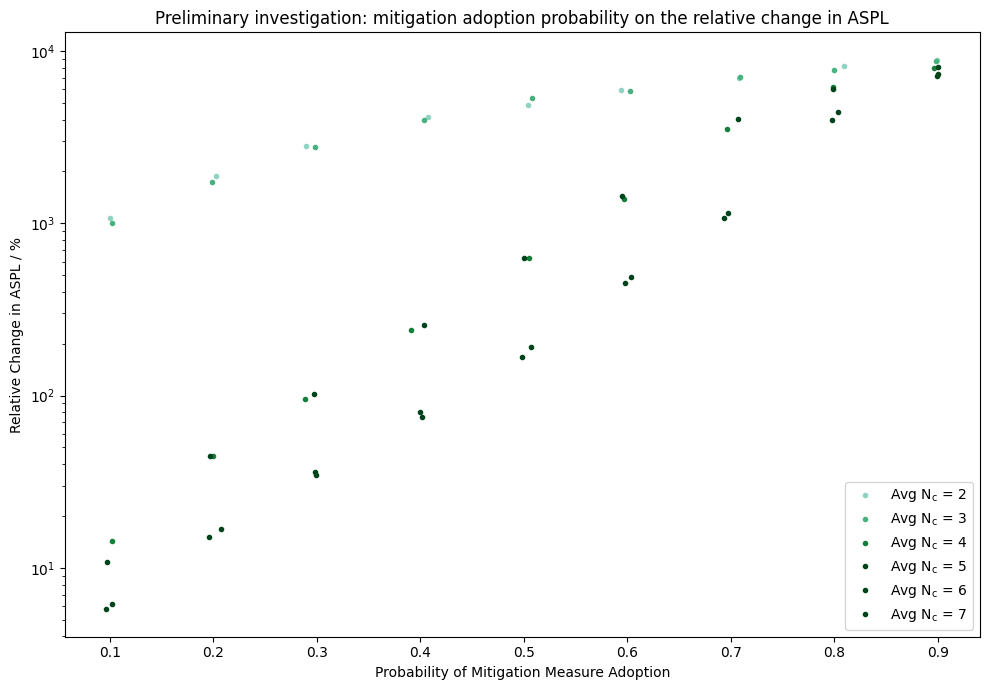

In [74]:
plt.figure(figsize = (10,7))
for c in cons:
    rel_change = [100*(apl_df[c][i][2] - apl_df[c][i][1])/apl_df[c][i][1] for i in range(len(apl_df[c]))]
    plt.plot([apl_df[c][i][0] for i in range(len(apl_df[c]))], rel_change, '.', color = cm.BuGn(int(c)/5), label = 'Avg N$_c$ = {}'.format(c))
plt.xlabel('Probability of Mitigation Measure Adoption')
plt.ylabel('Relative Change in ASPL / %')
plt.legend()
plt.title('Preliminary investigation: mitigation adoption probability on the relative change in ASPL')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Propagation Time

`        G = Pandemic_Network(nodes = 500, network_type='Small World', pandemicprob = 1, sicknode = 1, SW_connections = c, edge_randomness = 0.2, 
                             reduced_prob = 0.01, mitigation_proportion = m, plots = False, aspl = True)`

In [122]:
df = pd.read_csv('ASPL and Propagation Time - 2024-02-26.csv')
df = df.drop('Unnamed: 0', axis = 1)

# in each cell: [infectious, cumulative, ASPL]
for p in df.columns:
    for r in range(len(df[p])):
        for k in range(len(df[p][r])):
            df[p][r] = [str(i) for i in list(df[p][r][1:-1].split(', '))] # for some reason data imported as string
            # df[p][r] = [i for i in df[p][r][1:-2]]


AttributeError: 'list' object has no attribute 'split'

In [121]:
del df